In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [31]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [33]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [34]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [35]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [36]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [37]:
# Encoding 
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data['Sex'] = encode.fit_transform(data['Sex'])
data['ChestPainType'] = encode.fit_transform(data['ChestPainType'])
data['RestingECG'] = encode.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = encode.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = encode.fit_transform(data['ST_Slope'])

In [38]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


In [40]:
x = data.drop(['HeartDisease'], axis = 1)
y = data['HeartDisease']

In [41]:
# Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [42]:
x[0]

array([-1.4331398 ,  0.51595242,  0.22903206,  0.41090889,  0.82507026,
       -0.55134134,  0.01725451,  1.38292822, -0.8235563 , -0.83243239,
        1.05211381])

In [43]:
y[0]

0

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [46]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((734, 11), (734,), (184, 11), (184,))

In [47]:
x_train

array([[ 1.96119341,  0.51595242, -0.81699495, ..., -0.8235563 ,
         0.57471149, -0.59607813],
       [-1.96350436,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [ 1.21868302, -1.93816322, -0.81699495, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       ...,
       [ 0.2640268 ,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [ 0.68831845,  0.51595242, -0.81699495, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [ 1.11261011,  0.51595242, -0.81699495, ..., -0.8235563 ,
        -0.36338443, -0.59607813]])

In [48]:
x_test

array([[-0.26633776, -1.93816322,  1.27505906, ...,  1.21424608,
         1.04375945,  1.05211381],
       [-1.75135854,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [ 0.68831845,  0.51595242, -0.81699495, ..., -0.8235563 ,
         0.29328271, -0.59607813],
       ...,
       [ 1.43082884, -1.93816322, -0.81699495, ..., -0.8235563 ,
        -0.55100362,  1.05211381],
       [ 0.58224554,  0.51595242,  1.27505906, ...,  1.21424608,
         0.10566353, -0.59607813],
       [ 1.21868302,  0.51595242, -0.81699495, ...,  1.21424608,
        -0.83243239, -0.59607813]])

In [49]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 2, random_state = 0, n_estimators= 100, criterion = 'gini')
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [50]:
y_pred = model.predict(x_test)

In [51]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [52]:
model.predict_proba(x_train)

array([[0.19795205, 0.80204795],
       [0.83533741, 0.16466259],
       [0.28671319, 0.71328681],
       ...,
       [0.78111635, 0.21888365],
       [0.24621807, 0.75378193],
       [0.28895417, 0.71104583]])

<AxesSubplot:>

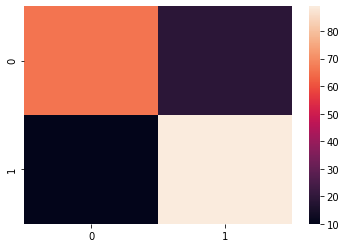

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

sns.heatmap(data = cm)

In [62]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

print(f"Model's Accuracy is {accuracy * 100} %")

Model's Accuracy is 84.23913043478261 %


In [75]:
# Second Model

from sklearn.neural_network import MLPClassifier

neural_model = MLPClassifier(solver = 'lbfgs',alpha = 1e-5,hidden_layer_sizes = (5,2), random_state = 42)

neural_model.fit(x_train, y_train)

C:\Users\Inbarasan Mani\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=42,
              solver='lbfgs')

In [78]:
y_pred = neural_model.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [80]:
accuracy_model_2 = accuracy_score(y_test, y_pred)
accuracy_model_2

0.8369565217391305

In [82]:
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[66, 19],
       [11, 88]], dtype=int64)

<AxesSubplot:>

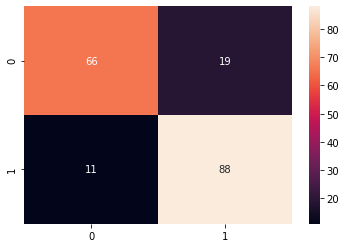

In [84]:
sns.heatmap(data= cm1, annot = True)